# Neural Networks - Classification

In this tutorial, we will create a classification model, that predicts the value (0 to 9) from a picture with a handwritten digit.

## 0. Import python modules

We will use the Tensoflow/Keras framework for neural network machine learning.

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from plot_loss import plot_loss # own function in plot_loss.py

## 1. Load the dataset

The goal is to make a model that can recognize handwritten digits. We make use of the MNIST dataset, which is a well-known dataset of handwritten digits: https://www.tensorflow.org/datasets/catalog/mnist. The training dataset has 60000 images, the test dataset 10000. Images are grayscale and have a size of 28x28 pixels. Each pixel has a value between 0 (black) and 255 (white). The dataset is already split into train and test, so we do not have to do this ourselves. In case this is not yet done, the `train_test_split` function of `sklearn.model_selection` can be used (`from sklearn.model_selection import train_test_split`).

In [12]:
# Load the training and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 60000 training images with 28x28 pixels
print(x_train.shape)
print(y_train.shape)
# print(x_train[0])

(60000, 28, 28)
(60000,)


x_train and x_test are 3-dimensional arrays used as input for the model. We can look at the first training image. This is a 2-dimensional array of 28 by 28. The y-values are the class the model should predict, it is a 1-dimensional array with a number 0 to 9.

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

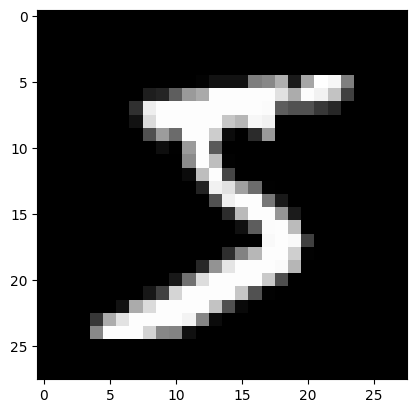

In [13]:
# y value of the first image (= class the model should predict)
print(y_train[0])
# x value (= input for the model)
print(x_train[0])
plt.imshow(x_train[0], cmap='gray', vmin=0, vmax=255)

## 2. Data transformation and normalisation

The input for our neural network with dense layers is a 2-dimensional array. The first dimension is the number of the sample. The second dimension is the number of the input node. So the 2-dimensional images need to be converted to a 1-dimensional array fitting the input layer of our model.

In [14]:
# transform the 2D-images to 1D-arrays (28 x 28 = 784)
x_train = x_train.reshape((-1, 784))   # or x_train.reshape((60000, 784))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)

(60000, 784)


Now we normalize the input samples using min-max normalisation to get values between 0 and 1. We use the `MinMaxScaler` from `sklearn.preprocessing`. As we know the maximum value is 255, we could also just divide by 255.

In [29]:
# scale input
import pandas as pd
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train) # makes values between 0 and 1 to normalize them
x_test_norm = scaler.transform(x_test)    # no fit, so that same scaling is used
# x_test

# x_test_norm
df = pd.DataFrame(x_test_norm[0])
df = df[df[:] > 0].dropna()
df
# print(x_train_norm[0])
# print(x_train[0])

,0
202,0.329412
203,0.725490
204,0.623529
205,0.592157
206,0.235294
...,...
714,0.156863
738,0.474510
739,0.996078
740,0.811765


Now we use one-hot encoding for the output. This means that the model will output 10 probabilities (probability that digit is 0, ..., probability that digit is 9). We use the `to_categorical` function from `tensorflow.keras.utils`. In case the dataset is a pandas dateframe, the `pd.get_dummies` function can be used.

In [7]:
# one-hot encoding for output
print(y_train[0])
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_train_onehot.shape)
print(y_train_onehot[0])

5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3. Define the model

##### The input layer has 784 nodes (28 x 28). We choose 2 hidden layers with 128 and 64 nodes and a `relu` activation function (feel free to try other values/functions). The output layer has 10 nodes corresponding to the one-hot encoding vector size. The activation function of the output layer is important. As the output are 10 probabilities, the sum of them must be 1. The `softmax` activation function is enforcing this. We choose Adam as optimizer with a learning rate of `0.001`. The loss is the `categorical_crossentropy` loss which is used for classification models using one-hot encoding as output (and so used together with the `softmax` activation function). We also define a `accuracy` metric.

In [8]:
# input layer 784 nodes
inputs = Input(shape=(784,))
# 2 hidden layers
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
# output layer
outputs = Dense(10, activation='softmax')(x)
# construct the model
model = Model(inputs, outputs, name='MNIST')
# print a summary
model.summary()
# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# """
# WARNING:tensorflow:From C:\Users\depaepeg\OneDrive - KdG\Cursussen\04. Data Science 2\Py\pyvenv\Lib\site-packages\keras\src\backend.py:1398: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.
# 
# Model: "MNIST"
# _________________________________________________________________
#  Layer (type)                Output Shape              Param #   
# =================================================================
#  input_1 (InputLayer)        [(None, 784)]             0         
#                                                                  
#  dense (Dense)               (None, 128)               100480    
#                                                                  
#  dense_1 (Dense)             (None, 64)                8256      
#                                                                  
#  dense_2 (Dense)             (None, 10)                650       
#                                                                  
# =================================================================
# Total params: 109386 (427.29 KB)
# Trainable params: 109386 (427.29 KB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________
# """

Model: "MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train the model

We train the model for 5 epochs, with a batch size of 32 (feel free to try other values). We take 10% of the training dataset for validation data.

In neural networks, a **batch** is a subset of the training data processed at once during each step of model training. Batches allow us to train the model incrementally rather than processing the entire dataset in memory, which would be slow and potentially impractical for large datasets.

Here's a breakdown of why **batches** are used and why setting `batch_size=32` is common:

### What is a Batch?
- When training, we often can't load all the data at once, especially for large datasets. Instead, we split the data into batches.
- Each **batch** is used to compute a single update to the model's weights.
- For example, if you have 10,000 training samples and a `batch_size` of 32, the model will train on 32 samples at a time, resulting in 313 steps (10,000 / 32) per epoch.

### Why Use Batches?
1. **Efficiency**: Processing a batch is faster than processing all data in memory.
2. **Memory Limitations**: It allows training on large datasets without needing to load all data into memory.
3. **Gradient Estimation**: Batches provide a more stable and smooth gradient update than single-sample updates, leading to faster convergence.

### Why `batch_size=32`?
Setting a `batch_size` to 32 is a popular choice because it provides a good balance between:
1. **Convergence Speed**: Smaller batches provide more frequent updates but increase computational overhead; larger batches make updates less frequent but can slow down convergence.
2. **Memory Efficiency**: 32 is often small enough to fit comfortably into memory (especially GPU memory) without slowing down computation too much.
3. **Empirical Success**: Many experiments show that batch sizes around 32–64 give good generalization and stability in training across various types of neural networks.

### How `batch_size` Affects Training
- **Small Batch Sizes** (e.g., 1-16): More frequent updates; can improve convergence but might be noisier.
- **Larger Batch Sizes** (e.g., 64-512): Smoother updates and often faster per-batch processing but can require more memory and may reduce model generalization if too large.

In practice, `batch_size=32` often balances these trade-offs well, but you can experiment with batch sizes depending on your hardware and dataset size.

To calculate the number of batches, you can use the formula:

\[
\text{Number of Batches} = \frac{\text{Total Samples}}{\text{Batch Size}}
\]

For example, if you have 100,000 test samples and you're using a batch size of 32, the number of batches would be:

\[
\text{Number of Batches} = \frac{100,000}{32} \approx 3125 \text{ batches}
\]

This means that the model will process 32 test samples at a time in 3125 steps to complete the evaluation on the entire test set. 

If the total number of samples isn't a perfect multiple of the batch size (for instance, if you have 100,000 samples but use a batch size of 33), there will be one last batch with fewer than 33 samples, so the model might process slightly fewer samples in the last batch.

Epoch 1/5


2024-11-06 03:18:57.660964: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8693 - loss: 0.4492 - val_accuracy: 0.9700 - val_loss: 0.1110
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9678 - loss: 0.1059 - val_accuracy: 0.9742 - val_loss: 0.0820
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0692 - val_accuracy: 0.9735 - val_loss: 0.0873
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0499 - val_accuracy: 0.9770 - val_loss: 0.0894
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9871 - loss: 0.0389 - val_accuracy: 0.9763 - val_loss: 0.0871


History.history:
 {'accuracy': [0.924740731716156, 0.9685925841331482, 0.9770185351371765, 0.9825555682182312, 0.9861111044883728], 'loss': [0.25576499104499817, 0.10339012742042542, 0.07337991148233414, 0.053427789360284805, 0.04289006441831589], 'val_accuracy': [0.9700000286102295, 0.9741666913032532, 0.9735000133514404, 0.9769999980926514, 0.9763333201408386

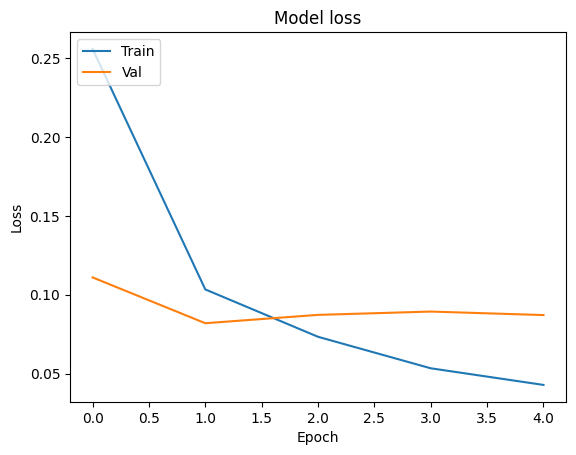

In [9]:
"""

"""
# train the model
history = model.fit(
    x_train_norm, # training input
    y_train_onehot, # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.1,
)
# plot loss function
plot_loss(history)

## 5. Evaluate the model

Now we evaluate our model with the test data, which has not been used during training. Have a look at the accuracy score.

In [10]:
# evaluate
model.evaluate(x_test_norm,y_test_onehot)

"""
The difference between the array `[0.0802, 0.9758]` and the progress data (`accuracy: 0.9735 - loss: 0.0912`) is due to the way **evaluation is reported** at different stages:

1. **Array Output `[0.0802, 0.9758]`**:
   - This is the final evaluation result output by `model.evaluate()` after running the evaluation on the entire test set.
   - It calculates the cumulative loss and accuracy over all test batches and provides a single summary result.

2. **Progress Data `accuracy: 0.9735 - loss: 0.0912`**:
   - This is shown during the evaluation, as batches are processed one at a time.
   - The accuracy and loss values reported at this stage may vary slightly because they are estimates based on the average performance over batches processed up to that point.
   - These values can change slightly at each batch, especially with very large datasets or small batch sizes, which means they might differ from the final values.

The final summary values may vary slightly from the progress report because of these minor batch-by-batch fluctuations. However, with larger datasets and smaller batch sizes, these differences usually become smaller."""

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0912


[0.08020340651273727, 0.9757999777793884]

## 6. Use the model to predict

We can start using the model to predict hand written digits. Here we predict the first 2 digits of the test dataset. The output of the model are probabilities. Look at the probabilities that the first digit is 7 and the second is a 2.

In [44]:
# predict 
predicted = model.predict(x_test_norm[:2])
print(predicted)
# what it should be
print(y_test[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[2.1493253e-07 6.3981761e-06 1.8519706e-05 3.9097731e-04 2.7486275e-11
  9.8001607e-08 6.1098121e-10 9.9957937e-01 9.6807821e-07 3.4237041e-06]
 [2.1877415e-12 1.4366253e-04 9.9985588e-01 3.6585291e-07 8.6217757e-13
  2.5770968e-08 8.8129974e-09 3.7152982e-11 2.9960489e-08 5.5585733e-13]]
[7 2]
